<a href="https://colab.research.google.com/github/chettkulkarni/deep_learning/blob/master/assignment%202/Keras_Logistic_regression_dropout_rms_optimser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with keras to find Credit Issuance 

In [0]:
import random
random.seed(1)
!pip install -q git+https://github.com/tensorflow/docs
from sklearn.model_selection import train_test_split
import pandas as pd
import pydot
import keras
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
tf.random.set_seed(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Downloading Data

In [0]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric',delim_whitespace=True,header=None)
columns = [
'checking_account',
'duration',
'credit_history',
'credit_amount',
'saving_account',
'present_emp_since',
'personal_status',
'residence_since',
'property',
'age',
'inst_plans',
'num_credits',
'dependents',
'telephone',
'foreign_worker',
'new_car',
'used_car',
'Debtors_None',
'Debtors_CoApplicant',
'Rent_hose',
'Own_Hose',
'Unemployed_And_Unskilled_Non_res',
'Unskilled_resident',
'skilled_official',
'status'
]
df.columns=columns

# Splitting data into trainand test

In [0]:
X=df.loc[:,df.columns!='status']
Y=df.loc[:,df.columns=='status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=1)

# Building A sequential model with dense layers and adam to be optimser

In [0]:
from keras.layers import Dense,Dropout, Flatten
def build_model():
  model = keras.Sequential()

  model.add(Dense(400, activation='relu',input_shape=(24,)))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  # optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse','accuracy'])
  
  model.summary()

  model.fit(X_train, y_train, epochs=100)

  plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

  test_predictions = model.predict(X_test).flatten()

  a = plt.axes(aspect='equal')
  plt.scatter(Y_test, test_predictions)
  plt.xlabel('True Values [MPG]')
  plt.ylabel('Predictions [MPG]')
  lims = [0, 2]
  plt.xlim(lims)
  plt.ylim(lims)
  _ = plt.plot(lims, lims)


  return model

# Creating another model with dropout

In [0]:
from keras.layers import Dense,Dropout, Flatten
def build_model_with_dropout():
  model = keras.Sequential()

  model.add(Dense(400, activation='relu',input_shape=(24,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse','accuracy'])
  
  model.summary()

  model.fit(X_train, y_train, epochs=100)

  plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

  test_predictions = model.predict(X_test).flatten()

  a = plt.axes(aspect='equal')
  plt.scatter(Y_test, test_predictions)
  plt.xlabel('True Values [MPG]')
  plt.ylabel('Predictions [MPG]')
  lims = [0, 2]
  plt.xlim(lims)
  plt.ylim(lims)
  _ = plt.plot(lims, lims)


  return model

# Creating another model with RMS optimser

In [0]:
from keras.layers import Dense,Dropout, Flatten
def build_model_with_rms_optimser():
  model = keras.Sequential()

  model.add(Dense(400, activation='relu',input_shape=(24,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1,activation='sigmoid'))
  # optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse','accuracy'])
  
  model.summary()

  model.fit(X_train, y_train, epochs=100)

  plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

  test_predictions = model.predict(X_test).flatten()

  a = plt.axes(aspect='equal')
  plt.scatter(Y_test, test_predictions)
  plt.xlabel('True Values [MPG]')
  plt.ylabel('Predictions [MPG]')
  lims = [0, 2]
  plt.xlim(lims)
  plt.ylim(lims)
  _ = plt.plot(lims, lims)


  return model

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 400)               10000     
_________________________________________________________________
dense_17 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_18 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 145,401
Trainable params: 145,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
400/400 [==============================] - 0s 381us/step - loss: 0.4065 - mae: 0.3877 - mse: 0.4065 - accuracy: 0.6250
Epoch 2/100
400/400 [==============================] - 0s 125us/step - loss: 0.3150 - mae: 0.3150 - mse: 0.3150 - 

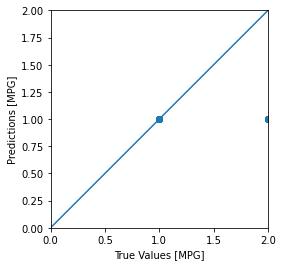

In [0]:
build_model()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 400)               10000     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                25664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 35,729
Trainable params: 35,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
400/400 [==============================] - 0s 298us/step - loss: 0.5166 - mae: 0.4628 - mse: 0.5166 - accuracy: 0.5725
Epoch 2/100
400/400 [==============================] - 0s 63us/step - loss: 0.3150 - mae: 0.3150 - mse: 0.3150 - acc

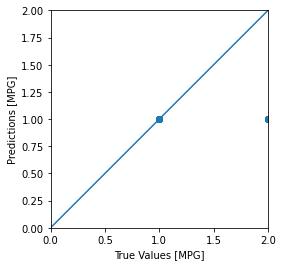

In [0]:
build_model_with_rms_optimser()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 400)               10000     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                25664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 35,729
Trainable params: 35,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
400/400 [==============================] - 0s 296us/step - loss: 0.4327 - mae: 0.4092 - mse: 0.4327 - accuracy: 0.6100
Epoch 2/100
400/400 [==============================] - 0s 60us/step - loss: 0.3150 - mae: 0.3150 - mse: 0.3150 - acc

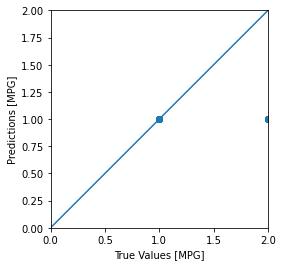

In [0]:
build_model_with_dropout()